# Прогнозирование оттока клиентов компании «Ниединогоразрыва.ком»

Мы работаем в компании «Ниединогоразрыва.ком». Занимаемся прогнозированием оттока клиентов. Необходимо подготовить модель машинного обучения, которая должна предсказать намерение пользователя уйти к другому провайдеру, классическая задача классификации. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Для работы мы используем персональные данные о некоторых клиентах, информацию об их тарифах и договорах, собранные командой оператора. Модель поможет снизить количество потерянных клиентов, что положительно скажется на прибыли компании. 
    
Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).
    
За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

На данном этапе нам нужно:

1. Провести исследовательский анализ данных;
2. Составить:
    - Список уточняющих вопросов;
    - Примерный план решения задачи.
    
Предоставленная информация представляет собой четыре датасета с исходными данными. В датасетах отражены персональные данные клиентов, информация об интернет-услугах, информация об услугах телефонии, а также информация о договорах. Необходимо учесть, что предоставленная информация может содержать лишь часть полезной информации, либо наоборот, иметь лишние данные. Дата выгрузки датасета - 1 февраля 2020 года.

    
    
____



В данной работе представлен процесс создания и проверки модели машинного обучения в целях формирования правильного бизнес-решения. Работа произведена в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
  
    
    
____
    
 
    
    
Часть 1. Изучение общей информации о предоставленных датасетах
    
1. <a href='#Импорт необходимых библиотек для работы с данными, загрузка датасета'>Импорт необходимых библиотек для работы с данными, загрузка датасетов</a>
2. <a href='#Изучение данных, получение общей информации'>Изучение данных, получение общей информации</a>
3. <a href='#Вывод_1'>Вывод</a>
    
    
Часть 2. Исследовательский анализ данных (EDA)
    
1. <a href='#Работа с пропусками'>Работа с пропусками</a>
2. <a href='#Изменение типа данных'>Изменение типа данных</a>
3. <a href='#Подготовка данных'>Подготовка данных</a>    
4. <a href='#Кодирование признаков'>Кодирование признаков</a>
5. <a href='#Общий анализ'>Общий анализ</a>
6. <a href='#Оценка мультиколлинеарности признаков'>Оценка мультиколлинеарности признаков</a>
7. <a href='#Вывод_2'>Вывод</a>
    
Часть 3. Создание моделей

1. <a href='#Подготовка признаков'>Подготовка признаков</a>
2. <a href='#Обучение моделей'>Обучение моделей</a>
3. <a href='#Тестирование модели'>Тестирование модели</a>    
4. <a href='#Интерпретация результатов'>Интерпретация результатов</a>
5. <a href='#Вывод_3'>Вывод</a>
    
<a href='#Вывод_4'>Общий вывод</a>
    

# Часть 1. Изучение общей информации 

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'></a>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасетов</p>

Импортируем необходимые библиотеки, загружаем датасеты, убираем ограничения на количество столбцов, отключаем предупреждения.

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
from functools import reduce
import seaborn as sns
from pandas import Timestamp as dt
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import timeit

In [2]:
try:
    contract = pd.read_csv('contract.csv')
    personal = pd.read_csv('personal.csv')
    internet = pd.read_csv('internet.csv')
    phone = pd.read_csv('phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению.

In [7]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


Выведем немного описательной статистики по каждому датасету.

In [11]:
contract.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,2041-JIJCI,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [12]:
personal.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,2041-JIJCI,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [13]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2041-JIJCI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [14]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2041-JIJCI,No
freq,1,3390


Также выведем несколько случайных строк для того, чтобы поближе посмотреть на датасеты.

In [15]:
contract.sample(n=10, random_state=42)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,1024-GUALD,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,24.80,24.8
2715,0484-JPBRU,2016-09-01,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,3620-EHIMZ,2015-10-01,No,Two year,No,Mailed check,19.35,1031.7
1807,6910-HADCM,2019-09-01,2019-10-01 00:00:00,Month-to-month,No,Electronic check,76.35,76.35
132,8587-XYZSF,2014-07-01,No,Two year,No,Bank transfer (automatic),50.55,3260.1
1263,6818-WOBHJ,2014-05-01,2020-01-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6
3732,3082-YVEKW,2018-03-01,No,Two year,Yes,Bank transfer (automatic),77.15,1759.4
1672,4737-AQCPU,2014-02-01,No,Two year,No,Credit card (automatic),72.10,5016.65
811,4853-RULSV,2014-02-01,2019-12-01 00:00:00,Two year,Yes,Credit card (automatic),104.00,7250.15
2526,5766-ZJYBB,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,19.40,19.4


In [16]:
personal.sample(n=10, random_state=42)

,customerID,gender,SeniorCitizen,Partner,Dependents
185,1024-GUALD,Female,0,Yes,No
2715,0484-JPBRU,Male,0,No,No
3825,3620-EHIMZ,Female,0,Yes,Yes
1807,6910-HADCM,Female,0,No,No
132,8587-XYZSF,Male,0,No,No
1263,6818-WOBHJ,Female,1,Yes,No
3732,3082-YVEKW,Female,0,Yes,Yes
1672,4737-AQCPU,Male,0,Yes,Yes
811,4853-RULSV,Male,0,No,No
2526,5766-ZJYBB,Male,0,No,No


In [17]:
internet.sample(n=10, random_state=42)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1615,1170-SASML,Fiber optic,No,Yes,Yes,No,No,No
1874,9314-QDMDW,DSL,No,Yes,No,No,Yes,No
3167,2434-EEVDB,Fiber optic,Yes,No,Yes,No,Yes,No
5287,7672-VFMXZ,DSL,Yes,No,No,Yes,No,No
4770,7445-WMRBW,DSL,No,Yes,Yes,Yes,Yes,No
3660,7036-ZZKBD,DSL,No,No,Yes,Yes,No,Yes
2943,7479-NITWS,Fiber optic,No,No,Yes,No,Yes,No
1471,3062-ICYZQ,Fiber optic,Yes,Yes,No,No,No,Yes
2459,5924-IFQTT,DSL,No,Yes,Yes,Yes,Yes,No
3226,4826-TZEVA,Fiber optic,No,Yes,No,No,No,No


In [18]:
phone.sample(n=10, random_state=42)

,customerID,MultipleLines
4743,5887-IKKYO,Yes
4825,7718-UPSKJ,No
472,3571-DPYUH,Yes
2722,3769-MHZNV,No
932,6732-FZUGP,Yes
4414,0868-VJRDR,No
3011,6685-GBWJZ,No
5811,2486-WYVVE,Yes
3784,9025-ZRPVR,No
4700,5727-MYATE,Yes


<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были  сделаны следующие выводы:

___


1. Для большего удобства данные можно свести в один датасет.


2. Заметили пропуски в столбце TotalCharges. Связаны с тем, что пользователи новые и еще ничего не платили.


2. После консультации осталось несколько вопросов:
    
    - на консультации было сказано, что после генерации признака life time необходимо удалить признаки BeginDate и EndDate. Можешь развернуть немного подробнее зачем именно это необходимо делать или же это просто история про корреляцию?
    
    - заполнять пропуски собираюсь -1, есть более адекватное решение на твой взгляд?
    
    - в продолжение к предыдущему вопросу, появилась идея обучить несколько моделей отдельно для пользователей с интернетом и пользователей с телефонами, и затем объединить все это в одну большую модель, насколько это приемлемое решение?
    

4. Примерный план работы:
    
    - подготовка данных: приведение названий колонок к snake_case, заполнение пропусков, генерирование дополнительных фичей, удаление ненужной информации, кодирование признаков;
    
    - машинное обучение: применение моделей машинного обучения для решения поставленной задачи;
    
    - получение фидбека от рефьюера, исправление неточностей, отправление итогового проекта на проверку.


___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, дефектов датасетов не выявлено, однако данные нуждаются в подготовке. Разберемся с этим в следующей части.

 # Часть 2. Исследовательский анализ данных (EDA) </p>

<a id='Работа с пропусками'></a>

### <p style="text-align:center"> Работа с пропусками</p>

Разберемся с пропусками в столбце TotalCharges. Связаны пропуски с временем жизни пользователей.

In [19]:
contract[contract['TotalCharges'] == " "]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [20]:
contract = contract.replace(r'^\s+$', 0, regex=True)

<a id='Изменение типа данных'></a>

### <p style="text-align:center"> Изменение типа данных </p>

Тип данных столбца TotalCharges не соответствует назначению.

In [21]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='ignore')

<a id='Подготовка данных'></a>

### <p style="text-align:center"> Подготовка данных </p>

In [22]:
def make_it_snake_case(data):
    '''Приводит названия колонок к snake_case'''
    new_columns = []
    for column in data.columns:
        column = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', column).lower()
        column = column.replace('__','_')
        new_columns.append(column)
    data.columns = new_columns
    return data
    
def get_life_time(data, column_1, column_2, unloading_time):
    '''Возвращает время жизни пользователя'''
    try:
        return (pd.to_datetime(data[column_2], format = '%Y-%m-%d') - (pd.to_datetime(data[column_1], format = '%Y-%m-%d'))).dt.days
    except:
        return (pd.to_datetime(unloading_time, format = '%Y-%m-%d') - (pd.to_datetime(data[column_1], format = '%Y-%m-%d'))).dt.days

def make_additional_columns(data):
    '''Создает вспомогательные колонки Exited и LifeTime'''
    return data.assign(
        Life_Time = lambda x: get_life_time(x, 'BeginDate', 'EndDate', '2020-02-01'),
        Exited = lambda x: np.where(x['EndDate'] == 'No', 0, 1)
    )

Объединим все датасеты в один.

In [23]:
dfs_to_merge = [contract, personal, internet, phone]

In [24]:
df = reduce(lambda left, right: pd.merge(left, right, how='outer'), dfs_to_merge).fillna('-1')

In [25]:
columns_to_drop = ['begin_date', 'end_date', 'customer_id']

In [26]:
prep_df = df.pipe(make_additional_columns).pipe(make_it_snake_case).drop(columns_to_drop, axis=1)

Проверяем.

In [27]:
prep_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,life_time,exited
0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,-1,31,0
1,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036,0
2,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123,1
3,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,-1,1371,0
4,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153,1


<a id='Кодирование признаков'></a>

### <p style="text-align:center"> Кодирование признаков </p>

In [28]:
columns_to_encode = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner',
                     'dependents', 'internet_service', 'online_security', 'online_backup',
                     'device_protection', 'tech_support', 'streaming_tv', 
                     'streaming_movies', 'multiple_lines']

In [29]:
encoder = OrdinalEncoder()
encoder.fit(prep_df[columns_to_encode]) 
prep_df[columns_to_encode] = pd.DataFrame(encoder.transform(prep_df[columns_to_encode])) 

In [30]:
prep_df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,life_time,exited
0,0.0,1.0,2.0,29.85,29.85,0.0,0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,31,0
1,1.0,0.0,3.0,56.95,1889.50,1.0,0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1036,0
2,0.0,1.0,3.0,53.85,108.15,1.0,0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,123,1
3,1.0,0.0,0.0,42.30,1840.75,1.0,0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1371,0
4,0.0,1.0,2.0,70.70,151.65,0.0,0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,153,1


<a id='Общий анализ'></a>

### <p style="text-align:center"> Общий анализ </p>

Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл. Для каждой группы посчитаем статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Построим гистограммы распределения.

Сравним поведение клиентов этих двух групп. Для каждой построим два любых графика, изображающих:

 - долю пользователей телефонной связи;
 - 
 долю интернет-пользователей.

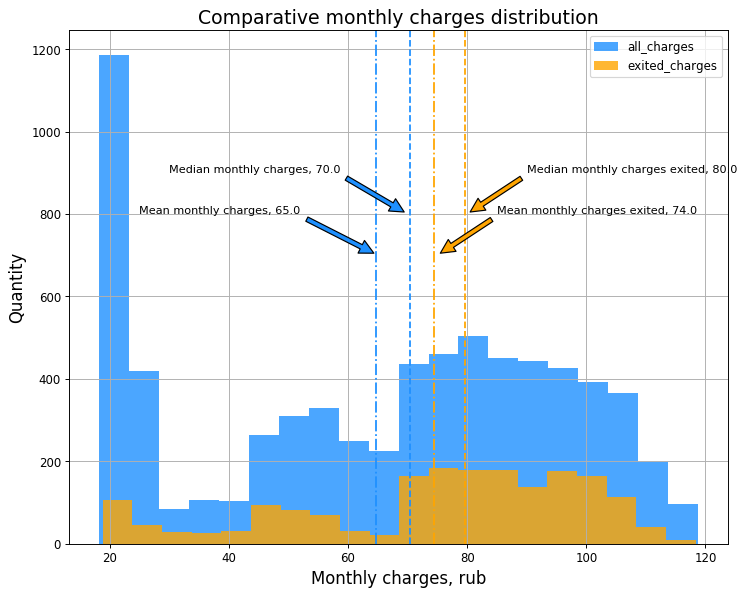

In [31]:
plt.figure(figsize=(10,8), dpi = 85);

plt.hist(prep_df['monthly_charges'], color='dodgerblue', label='all_charges', alpha=0.8, bins = 20);
plt.hist(prep_df.loc[prep_df['exited'] == 1, 'monthly_charges'], color='orange', label='exited_charges', alpha=0.8, bins = 20);

mean_monthly_charges = prep_df['monthly_charges'].mean()
mean_monthly_charges_exited = prep_df.loc[prep_df['exited'] == 1, 'monthly_charges'].mean()
median_monthly_charges = prep_df['monthly_charges'].median()
median_monthly_charges_exited = prep_df.loc[prep_df['exited'] == 1, 'monthly_charges'].median()

plt.axvline(mean_monthly_charges, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_monthly_charges_exited, color='orange', linestyle='dashdot')
plt.axvline(median_monthly_charges, color='dodgerblue', linestyle='dashed')
plt.axvline(median_monthly_charges_exited, color='orange', linestyle='dashed')

plt.annotate(f'Mean monthly charges, {round(mean_monthly_charges, 0)}', xy=(65, 700), xytext=(25, 800), fontsize=9.5, 
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean monthly charges exited, {round(mean_monthly_charges_exited, 0)}', xy=(75, 700), xytext=(85, 800),
             fontsize=9.5, arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate(f'Median monthly charges, {round(median_monthly_charges, 0)}', xy=(70, 800), xytext=(30, 900), fontsize=9.5, 
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Median monthly charges exited, {round(median_monthly_charges_exited, 0)}', xy=(80, 800), xytext=(90, 900), 
             fontsize=9.5, arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative monthly charges distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=14)
plt.xlabel('Monthly charges, rub', fontsize=14)

plt.grid()
plt.legend()
plt.show()

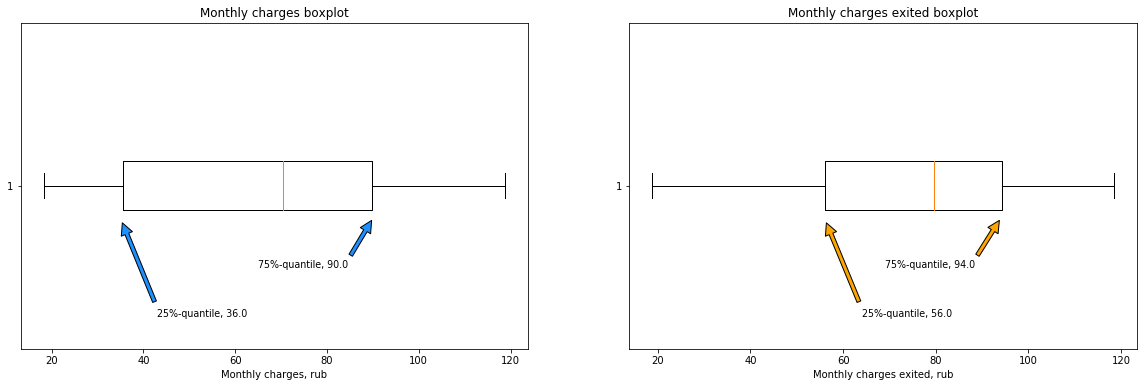

In [32]:
f, axs = plt.subplots(1, 2, figsize=(20,6))
axs[0].boxplot(prep_df['monthly_charges'], notch=False, sym='+', vert=False, whis=1.5,positions=None, widths=None, 
                  patch_artist=False, bootstrap=None, usermedians=None, conf_intervals=None);
axs[0].annotate(f'25%-quantile, {round(prep_df["monthly_charges"].quantile(0.25), 0)}', xy=(35, 0.9), xytext=(43, 0.6),
                fontsize=9.5, arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
axs[0].annotate(f'75%-quantile, {round(prep_df["monthly_charges"].quantile(0.75), 0)}', xy=(90, 0.9), xytext=(65, 0.75), 
                fontsize=9.5, arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
axs[0].set_title('Monthly charges boxplot');
axs[0].set_xlabel('Monthly charges, rub');
axs[0].set_ylabel('');

axs[1].boxplot(prep_df.loc[prep_df['exited'] == 1, 'monthly_charges'], notch=False, sym='+', vert=False, whis=1.5, 
                   positions=None, widths=None, patch_artist=False, bootstrap=None, usermedians=None, conf_intervals=None);
axs[1].annotate(f'25%-quantile, {round(prep_df.loc[prep_df["exited"] == 1, "monthly_charges"].quantile(0.25), 0)}',
                xy=(56, 0.9), xytext=(64, 0.6), fontsize=9.5, arrowprops=dict(facecolor='orange', shrink=0.05))
axs[1].annotate(f'75%-quantile, {round(prep_df.loc[prep_df["exited"] == 1, "monthly_charges"].quantile(0.75), 0)}',
                xy=(94, 0.9), xytext=(69, 0.75), fontsize=9.5, arrowprops=dict(facecolor='orange', shrink=0.05))
axs[1].set_title('Monthly charges exited boxplot');
axs[1].set_xlabel('Monthly charges exited, rub');
axs[1].set_ylabel('');

Найдем отношение ушедших и оставшихся клиентов. Этот же показатель будет отвечать и за адекватность моделей.

In [33]:
prep_df['exited'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: exited, dtype: float64

Сгруппируем данные по целевому признаку и поищем зависимости.

In [34]:
columns_to_analize = ['paperless_billing', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 
         'dependents', 'life_time', 'exited']

In [35]:
prep_df[columns_to_analize].groupby('exited').agg({'mean', 'median', 'std', 'var'}).T.round(2)

exited                             0           1
paperless_billing std           0.50        0.43
                  mean          0.54        0.75
                  var           0.25        0.19
                  median        1.00        1.00
monthly_charges   std          31.09       24.67
                  mean         61.27       74.44
                  var         966.75      608.41
                  median       64.43       79.65
total_charges     std        2329.95     1890.82
                  mean       2549.91     1531.80
                  var     5428686.65  3575211.60
                  median     1679.52      703.55
gender            std           0.50        0.50
                  mean          0.51        0.50
                  var           0.25        0.25
                  median        1.00        0.00
senior_citizen    std           0.33        0.44
                  mean          0.13        0.25
                  var           0.11        0.19
                  median        0.00        0.00
partner           std           0.50        0.48
                  mean          0.53        0.36
                  var           0.25        0.23
                  median        1.00        0.00
dependents        std           0.48        0.38
                  mean          0.34        0.17
                  var           0.23        0.14
                  median        0.00        0.00
life_time         std         733.90      595.91
                  mean       1144.45      624.46
                  var      538606.18   355109.40
                  median     1157.00      365.00

Клиентов  - 7043 человека. Из них порядка 27 % с меткой оттока.

Какие еще первичные выводы мы можем сделать о текущих клиентах:

- мужчина и женщина - примерно одинаковое количество тех и других;
- в среднем у оставшихся пользователей платежи за месяц ниже, чем у ушедших;
- большинство ушедших пользователей предпочитали paperless_billing;
- среди ушедших пользователей примерно в два раза больше senior_citizen, т.е. пенсионеров;
- большинство пользователей, оставшихся клиентами компании имеют партнера и детей.

На первый взгляд факторами оттока являются:

 - paperless_billing;
 - monthly_charges;
 - senior_citizen.

<a id='Оценка мультиколлинеарности признаков'></a>

### <p style="text-align:center"> Оценка мультиколлинеарности признаков </p>

В качестве оценки мультиколлинеарности признаков найдем коффициенты корреляции этих признаков, если зависимость сильнее 0.7 попытаемся оставить только один признак из двух.

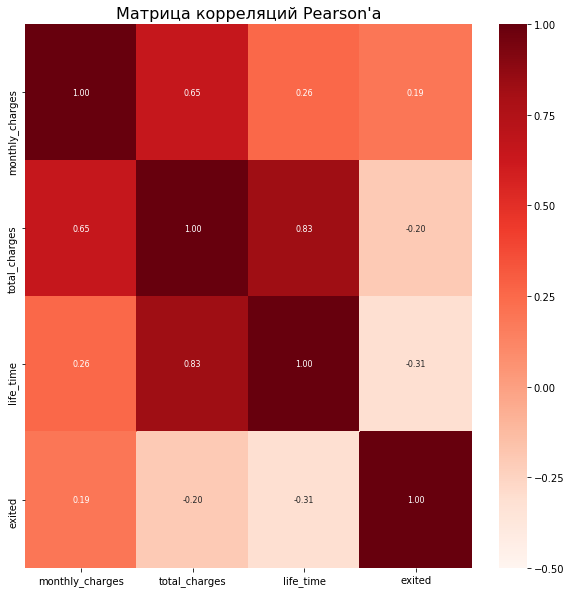

In [36]:
corr_matrix=prep_df[['monthly_charges', 'total_charges', 'life_time', 'exited']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-0.5, annot_kws={"size": 8}, cmap="Reds")
plt.title("Матрица корреляций Pearson'a", fontsize = 16)
plt.show()

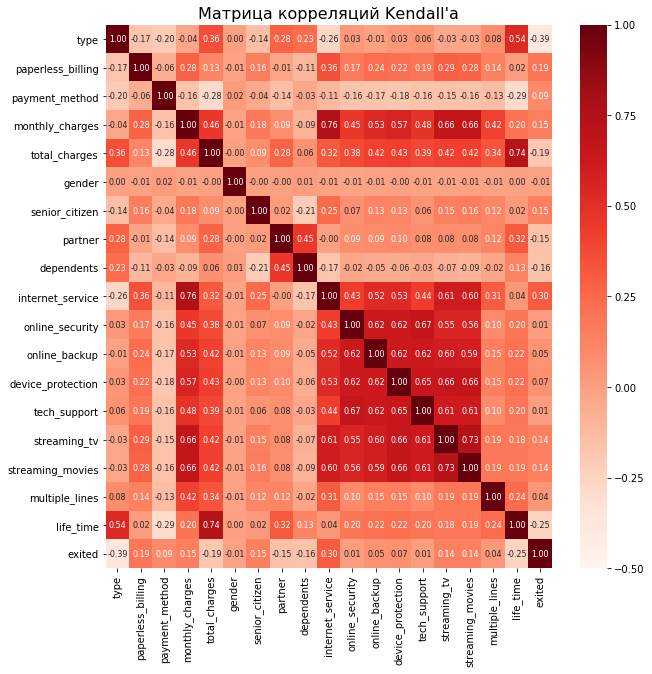

In [37]:
corr_matrix=prep_df.corr('kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-0.5, annot_kws={"size": 8}, cmap="Reds")
plt.title("Матрица корреляций Kendall'а", fontsize = 16)
plt.show()

Принимаем решение удалить некоторые столбцы на основе информации от обучения моделей на валидации.

In [38]:
df_del_corr = prep_df.copy()
df_del_corr = df_del_corr.drop(['streaming_tv', 'partner', 'senior_citizen','dependents', 'multiple_lines', 'online_backup',
                                'tech_support', 'gender', 'device_protection', 'paperless_billing', 'streaming_movies',
                                'internet_service'], axis=1)

Посмотрим на матрицу корреляции после удаления лишних признаков.

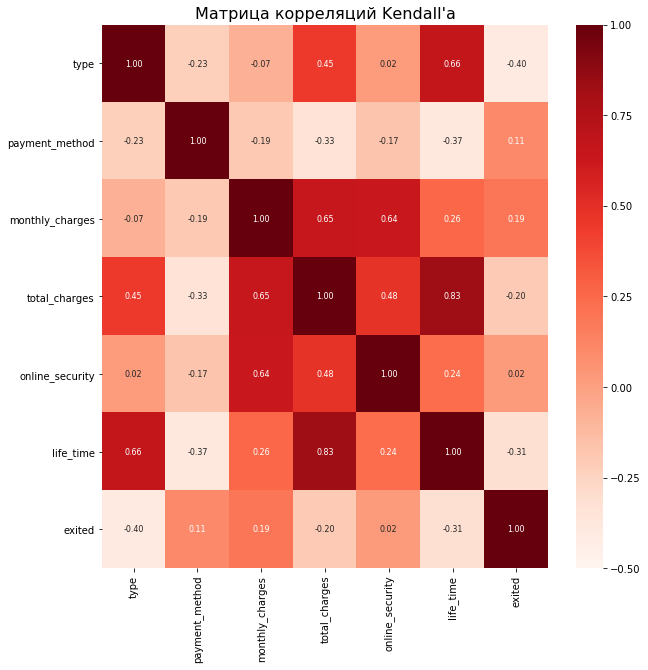

In [39]:
corr_matrix=df_del_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-0.5, annot_kws={"size": 8}, cmap="Reds")
plt.title("Матрица корреляций Kendall'а", fontsize = 16)
plt.show()

Факторами оттока будем считать оставшиеся на матрице корреляций признаки. 


<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе исследовательского анализа данных (EDA) были сделаны следующие выводы:

___


1. Была проведена подготовительная работа с данными.


2. Был выполнен исследовательский анализ данных, выявлены предварительные факторы оттока.


3. После оценки мультиколлинеарности признаков, а также по результатам подбора параметров на валидации было принято решение удалить часть столбцов.



___

Таким образом был выполнен исследовательский анализ данных (EDA). Переходим к обучению моделей.

#  Часть 3. Создание моделей

<a id='Подготовка признаков'></a>

### <p style="text-align:center"> Подготовка признаков </p>

Разделим выборку на обучающую, валидационную и тестовую выборки.

In [40]:
X = df_del_corr.drop('exited', axis=1)
y = df_del_corr['exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [41]:
print(f'Размер тренировочной выборки: признаки - {X_train.shape} и целевой признак {len(y_train)}')

Размер тренировочной выборки: признаки - (4225, 6) и целевой признак 4225


In [42]:
print(f'Размер валидационной выборки: признаки - {X_valid.shape} и целевой признак {len(y_valid)}')

Размер валидационной выборки: признаки - (1409, 6) и целевой признак 1409


In [43]:
print(f'Размер тестовой выборки: признаки - {X_test.shape} и целевой признак {len(y_test)}')

Размер тестовой выборки: признаки - (1409, 6) и целевой признак 1409


Стандартизируем данные.

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train) 
X_valid_st = scaler.transform(X_valid) 
X_test_st = scaler.transform(X_test)

In [45]:
def metrics(target, prediction, probabilities):
    print('AUC-ROC', roc_auc_score(target, probabilities))
    print('Accuracy', accuracy_score(target, prediction))

<a id='Обучение моделей'></a>

### <p style="text-align:center"> Обучение моделей </p>

Обучим модель RandomForest Classifier.

In [46]:
start = timeit.default_timer()
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=4, 
                                min_samples_leaf=2, min_samples_split=3, 
                                bootstrap=True, n_jobs=-1) 
rf_clf.fit(X_train_st, y_train)
prediction_valid = rf_clf.predict(X_valid_st)
probabilities_one_valid = rf_clf.predict_proba(X_valid_st)[:, 1]
stop = timeit.default_timer()

In [47]:
metrics(y_valid, prediction_valid, probabilities_one_valid)
print(f'Time spent: {stop - start:.2f} sec')

AUC-ROC 0.8465150223462243
Accuracy 0.8005677785663591
Time spent: 2.54 sec


Как видим, Random Forest неплохо подходит для решения поставленной задачи. Далее попробуем Logistic Regression.

In [48]:
start = timeit.default_timer()
log_reg = LogisticRegression(random_state=42, penalty='l2', C=2, n_jobs=-1) 
log_reg.fit(X_train_st, y_train)
prediction_valid = log_reg.predict(X_valid_st)
probabilities_one_valid = log_reg.predict_proba(X_valid_st)[:, 1]
stop = timeit.default_timer()

In [49]:
metrics(y_valid, prediction_valid, probabilities_one_valid)
print(f'Time spent: {stop - start:.2f} sec')

AUC-ROC 0.8070965408561315
Accuracy 0.7799858055358411
Time spent: 0.01 sec


Как видим, нам не подходит Logistic Regression для решения поставленной задачи. Попробуем SGD Classifier.

In [50]:
start = timeit.default_timer()
sgd_clf = SGDClassifier(random_state=42, loss='modified_huber', penalty='l2', alpha=0.03,  n_jobs=-1) 
sgd_clf.fit(X_train_st, y_train)
prediction_valid = sgd_clf.predict(X_valid_st)
probabilities_one_valid = sgd_clf.predict_proba(X_valid_st)[:, 1]
stop = timeit.default_timer()

In [51]:
metrics(y_valid, prediction_valid, probabilities_one_valid)
print(f'Time spent: {stop - start:.2f} sec')

AUC-ROC 0.8087731535301868
Accuracy 0.7764371894960965
Time spent: 0.01 sec


Как видим, нам не подходит SGD Classifier для решения поставленной задачи. Попробуем CatBoost Classifier.

In [52]:
start = timeit.default_timer()
cat_boost_clf = CatBoostClassifier(iterations=1000, custom_metric='Accuracy', eval_metric='AUC',
                                   sampling_frequency='PerTreeLevel', random_state=42, learning_rate=0.55, 
                                   l2_leaf_reg=2, bagging_temperature=6, depth=3)
cat_boost_clf.fit(X_train_st, y_train)
prediction_valid = cat_boost_clf.predict(X_valid_st)
probabilities_one_valid = cat_boost_clf.predict_proba(X_valid_st)[:, 1]
stop = timeit.default_timer()

0:	total: 51.7ms	remaining: 51.7s
1:	total: 55ms	remaining: 27.4s
2:	total: 58.8ms	remaining: 19.6s
3:	total: 62.1ms	remaining: 15.5s
4:	total: 84.6ms	remaining: 16.8s
5:	total: 97.5ms	remaining: 16.2s
6:	total: 100ms	remaining: 14.2s
7:	total: 104ms	remaining: 12.8s
8:	total: 116ms	remaining: 12.7s
9:	total: 119ms	remaining: 11.8s
10:	total: 195ms	remaining: 17.5s
11:	total: 198ms	remaining: 16.3s
12:	total: 201ms	remaining: 15.3s
13:	total: 205ms	remaining: 14.5s
14:	total: 209ms	remaining: 13.7s
15:	total: 291ms	remaining: 17.9s
16:	total: 296ms	remaining: 17.1s
17:	total: 299ms	remaining: 16.3s
18:	total: 303ms	remaining: 15.6s
19:	total: 307ms	remaining: 15s
20:	total: 399ms	remaining: 18.6s
21:	total: 402ms	remaining: 17.9s
22:	total: 404ms	remaining: 17.2s
23:	total: 408ms	remaining: 16.6s
24:	total: 411ms	remaining: 16s
25:	total: 414ms	remaining: 15.5s
26:	total: 486ms	remaining: 17.5s
27:	total: 490ms	remaining: 17s
28:	total: 491ms	remaining: 16.4s
29:	total: 493ms	remaining

In [53]:
metrics(y_valid, prediction_valid, probabilities_one_valid)
print(f'Time spent: {stop - start:.2f} sec')

AUC-ROC 0.9375778242785915
Accuracy 0.9070262597586941
Time spent: 12.41 sec


<a id='Тестирование модели'></a>

### <p style="text-align:center"> Тестирование модели </p>

In [54]:
prediction_test = cat_boost_clf.predict(X_test_st)
probabilities_one_test = cat_boost_clf.predict_proba(X_test_st)[:, 1]

Основные метрики на тестовой выборке.

In [55]:
metrics(y_test, prediction_test, probabilities_one_test)

AUC-ROC 0.9603503061303572
Accuracy 0.921930447125621


<a id='Интерпретация результатов'></a>

### <p style="text-align:center"> Интерпретация результатов </p>

Для лучшей интерпретируемости результатов выведем ROC-AUC и confusion matrix, а также feature importance.

Как видно на матрице ошибок, наша модель достаточно редко ошибается как в предсказывании потери клиента, так и в предсказывании его лояльности.

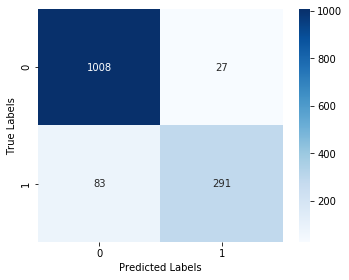

In [56]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, prediction_test),
            annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [57]:
pred_proba_rf_clf = rf_clf.predict_proba(X_test_st)[:, 1]
pred_proba_log_reg = log_reg.predict_proba(X_test_st)[:, 1]
pred_proba_sgd_clf = sgd_clf.predict_proba(X_test_st)[:, 1]

На сравнительном графике видно, насколько лучше CatBoost Classifier всех остальных моделей. На втором месте RandomForest Classifier, далее остальные.

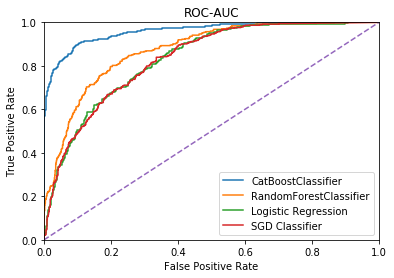

In [58]:
plt.figure(0).clf()
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)
plt.plot(fpr,tpr,label="CatBoostClassifier")
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_rf_clf)
plt.plot(fpr,tpr,label="RandomForestClassifier")
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_log_reg)
plt.plot(fpr,tpr,label="Logistic Regression")
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_sgd_clf)
plt.plot(fpr,tpr,label="SGD Classifier")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc=0)
plt.show()

Нижепредставленный график позволит лучше понять причины ухода клиентов.

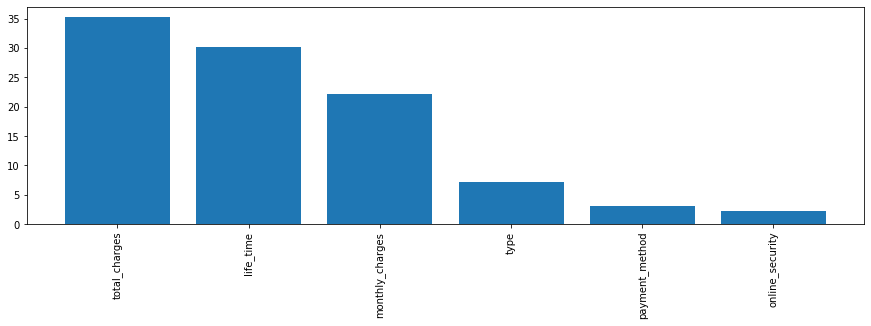

In [59]:
df_feature_importance = pd.DataFrame(cat_boost_clf.feature_importances_, index=df_del_corr.drop('exited', axis=1).columns, 
                                     columns=['feature_importance']).sort_values('feature_importance', ascending=False)
plt.figure(figsize=(15,4))
plt.bar(df_feature_importance.index, df_feature_importance['feature_importance'])
plt.xticks(rotation=90)
plt.show()

<a id='Вывод_3'></a>


### <p style="text-align:center"> Вывод</p>

##### В ходе работы по обучению и тестированию моделей добились следующего:

___


1. Было обучено 4 модели машинного обучения: CatBoost Classifier, Random Forest Classifier, Logistic Regression и SGD Classifier.


2. В исследовательском анализе отметили факторы оттока, наиболее сильными оказались total_charges, life_time, monthly_charges и т.д.


3. В ходе обучения моделей была выбрана CatBoost Classifier, которая дала значение AUC-ROC 0.960, значение дополнительной интерпретационной метрики Accuracy 0.922. Качество остальных моделей оказалось похуже.


___


<a id='Вывод_4'></a>

# Часть 4. Общий вывод

1. План был выполнен полностью, однако в плане не было учтено несколько важных шагов, таких как оценка мультиколлинеарности и  стандартизация признаков.

2. Трудности возникли на этапе подбора гиперпараметров моделей машинного обучения, хотелось спроектировать модель с наибольшими целевыми метриками, этот процесс занял большую часть работы. 

3. Ключевым шагом в решении задачи является в первую очередь определение признаков, играющих наибольшую роль в обучении моделей. После построения гистогаммы важности признаков и удаления лишних из них, получилось добиться целевого значения точности.

4. Итоговой моделью стала CatBoost Classifier, со значением целевой метрики AUC-ROC 0.960 на тестовой выборке, а также интерпретационной метрики Accuracy 0.922, что свидетельствует о высоких показателях точности модели.